https://github.com/jbmouret/matplotlib_for_papers

In [2]:
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt
import numpy as np

In [3]:
import brewer2mpl

bmap = brewer2mpl.get_map('Set1', 'qualitative', 7)
colors = bmap.mpl_colors

In [4]:
def load_summary(file_name):
    df = pd.read_csv(file_name)
    df = df[df.derivCount > 0]
    return df

def workdir(realisation):
    return glob('work/split/{}/logs/*/'.format(realisation))[0]

def load_realisations(realisations):
    workdirs = {r: workdir(r) for r in realisations}
    summaries = {r: load_summary('{}/splitting.csv'.format(wd)) for r, wd in workdirs.items()}
    return summaries

In [9]:
realisations = [
    'Baseline.baseline',
    'Alignments.isi',
    'Alignments.jamr',
    'Alignments.combine',
    'Syntax.easyccg',
    'Alignments.isi+Syntax.easyccg',
    'Alignments.jamr+Syntax.easyccg',
    'Alignments.combine+Syntax.easyccg'
]
summaries = load_realisations(realisations)

In [10]:
named_summaries = [('syn=gold align=gold', summaries['Baseline.baseline']),
                   ('syn=easyccg align=gold', summaries['Syntax.easyccg']),
                   ('syn=gold align=combine', summaries['Alignments.combine']),
                   ('syn=easyccg align=combine', summaries['Alignments.combine+Syntax.easyccg']),
                   #('syn=gold align=isi', summaries['Alignments.isi']),
                   #('syn=easyccg align=isi', summaries['Alignments.isi+Syntax.easyccg']),
                   #('syn=gold align=jamr', summaries['Alignments.jamr']),
                   #('syn=easyccg align=jamr', summaries['Alignments.jamr+Syntax.easyccg'])
                  ]

In [11]:
def covered_sentences(span_length, df):
    return len(df[df.maxSpanLength <= span_length])

syn=gold align=gold: 38
syn=easyccg align=gold: 48
syn=gold align=combine: 44
syn=easyccg align=combine: 45


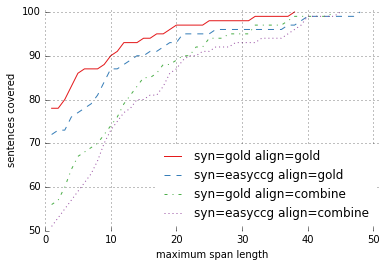

In [15]:
def plot_max_span_lengths(named_dfs, save_file_name=None):
    index = 0
    linestyles = ['-', '--', '-.', ':']
    for n, df in named_dfs:
        max_length = df['maxSpanLength'].max()
        print('{}: {}'.format(n, max_length))
        x = np.arange(1, max_length + 1)
        y = [covered_sentences(i, df) for i in range(1, max_length + 1)]
        plt.plot(x, y, color=colors[index], label=n, linestyle=linestyles[index % len(linestyles)])
        index += 1
    
    ax = plt.gca()
    ax.set_frame_on(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.get_xaxis().set_view_interval(1, 51)
    ax.get_yaxis().set_view_interval(50, 101)
    plt.xlabel('maximum span length')
    plt.ylabel('sentences covered')
    ax.grid()
    legend = ax.legend(loc='lower right')
    legend.get_frame().set_edgecolor('white')
    if save_file_name:
        plt.savefig(save_file_name)
    plt.show()
plot_max_span_lengths(named_summaries, 'max_span_lengths.pdf')

In [16]:
perfect_baseline = covered_sentences(1, summaries['Baseline.baseline'])
perfect_tools = covered_sentences(1, summaries['Alignments.isi+Syntax.easyccg'])
perfect_baseline - perfect_tools

21

In [17]:
import re

def log_file(realisation):
    return workdir(realisation) + 'log.txt'

size_re = re.compile(r'Lexicon size after splitting: (\d+)')

def lexicon_size(realisation):
    lex_size = None
    lf = log_file(realisation)
    with open(lf) as log:
        c = 0
        for l in log:
            m = size_re.search(l)
            if m:
                lex_size = m.group(1)
            c += 1
    return lex_size

lexicon_sizes = {r: lexicon_size(r) for r in realisations}
lexicon_sizes

{'Alignments.combine': '4435',
 'Alignments.combine+Syntax.easyccg': '5401',
 'Alignments.isi': '6811',
 'Alignments.isi+Syntax.easyccg': '11082',
 'Alignments.jamr': '11084',
 'Alignments.jamr+Syntax.easyccg': '14092',
 'Baseline.baseline': '7908',
 'Syntax.easyccg': '11123'}

In [158]:
alignment_summaries = load_realisations(['Syntax.easyccg', 'Alignments.jamr+Syntax.easyccg', 'Alignments.isi+Syntax.easyccg', 'Alignments.combine+Syntax.easyccg'])
alignment_named = [
    ('gold', alignment_summaries['Syntax.easyccg']),
    ('jamr', alignment_summaries['Alignments.jamr+Syntax.easyccg']),
    ('isi', alignment_summaries['Alignments.isi+Syntax.easyccg']),
    ('combine', alignment_summaries['Alignments.combine+Syntax.easyccg']),
]

gold: 48
jamr: 48
isi: 45
combine: 45


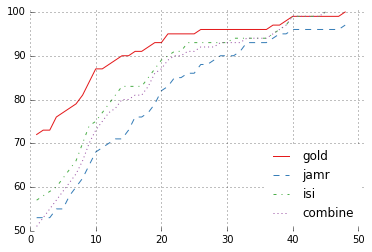

In [159]:
plot_max_span_lengths(alignment_named)